In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, geom_line, aes, labs, theme_minimal, geom_boxplot, coord_flip
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split
plt.rcParams['figure.figsize'] = [10, 5]

In [7]:
df = pd.read_csv('model_data.csv')
df['WINNER_cat'] = df['WINNER'].astype('category')

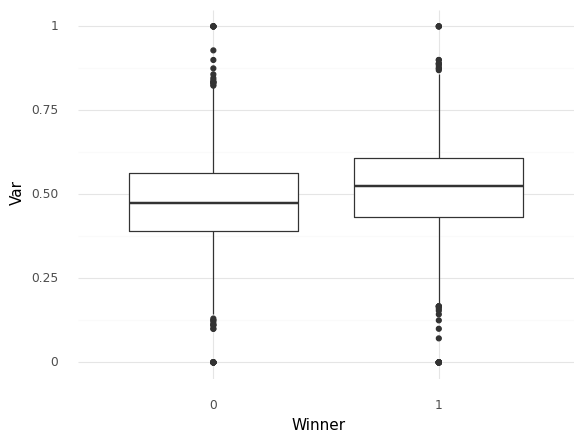

<ggplot: (8783928541733)>

In [8]:
(ggplot(df, aes('WINNER_cat', 'BOXOUT_TM_RBS_RATIO'))
 + geom_boxplot() + 
labs(x = "Winner", y = "Var") + 
theme_minimal())

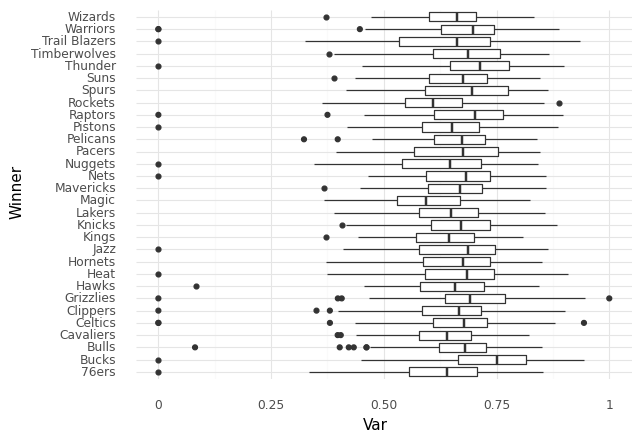

<ggplot: (8783928560161)>

In [9]:
(ggplot(df, aes('TEAM_NAME', 'CONTEST_RATE'))
 + geom_boxplot() + 
labs(x = "Winner", y = "Var") + 
theme_minimal() + 
coord_flip())

In [10]:
away = df.iloc[::2]
home = df.iloc[1::2]

In [11]:
y = away['WINNER'].values
X = away[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=426, test_size=.3)

In [13]:
def model_preds(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2', 'l1']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
    lr = grid_search.fit(X_train, y_train)

    # Predictions and predicted probabilities for training set
    train_preds = lr.predict(X_train)
    train_prob = lr.predict_proba(X_train)[:,1]

    # Predictions and predicted probabilities for test set
    test_preds = lr.predict(X_test)
    test_prob = lr.predict_proba(X_test)[:,1]
    return train_preds, train_prob, test_preds, test_prob

In [14]:
def model_cv(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2', 'l1']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
    
    lr = grid_search.fit(X_train, y_train)
    scores = cross_validate(
    estimator = lr, 
    X = X_train, 
    y = y_train,
    scoring = ['accuracy'], 
    cv = 5, 
    n_jobs = -1)
    accuracy_cv = scores['test_accuracy'].mean()
    return accuracy_cv

In [15]:
away_ratio_train, away_ratio_train_p, away_ratio_test, away_ratio_test_p = model_preds(X_train, X_test, y_train, y_test)
accuracy_ar = model_cv(X_train, X_test, y_train, y_test)
print(accuracy_ar)

0.6160019052155274


In [16]:
print(metrics.classification_report(y_train, away_ratio_train))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       921
           1       0.60      0.44      0.51       696

    accuracy                           0.63      1617
   macro avg       0.63      0.61      0.61      1617
weighted avg       0.63      0.63      0.62      1617



In [17]:
print(metrics.classification_report(y_test, away_ratio_test))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       395
           1       0.62      0.46      0.53       298

    accuracy                           0.65       693
   macro avg       0.64      0.63      0.62       693
weighted avg       0.64      0.65      0.64       693



In [18]:
fpr_away_ratio, tpr_away_ratio, thresh = roc_curve(y_test, away_ratio_test_p)

In [19]:
X_diff = away[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values

X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify=y, random_state=426, test_size=.3)

In [20]:
away_diff_train, away_diff_train_p, away_diff_test, away_diff_test_p = model_preds(X_train, X_test, y_train, y_test)
accuracy_ad = model_cv(X_train, X_test, y_train, y_test)
print(accuracy_ad)

/Users/davidteuscher/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
/Users/davidteuscher/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


0.6147597046915932


In [21]:
print(metrics.classification_report(y_train, away_diff_train))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       921
           1       0.59      0.47      0.52       696

    accuracy                           0.63      1617
   macro avg       0.62      0.61      0.61      1617
weighted avg       0.63      0.63      0.62      1617



In [22]:
print(metrics.classification_report(y_test, away_diff_test))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       395
           1       0.64      0.52      0.57       298

    accuracy                           0.67       693
   macro avg       0.66      0.65      0.65       693
weighted avg       0.66      0.67      0.66       693



In [23]:
fpr_away_diff, tpr_away_diff, thresh = roc_curve(y_test, away_diff_test_p)

In [24]:
y = home['WINNER'].values
X = home[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=426, test_size=.3)

In [25]:
home_ratio_train, home_ratio_train_p, home_ratio_test, home_ratio_test_p = model_preds(X_train, X_test, y_train, y_test)
accuracy_hr = model_cv(X_train, X_test, y_train, y_test)
print(accuracy_hr)

0.6270750178613956


In [26]:
print(metrics.classification_report(y_train, home_ratio_train))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51       696
           1       0.65      0.79      0.71       921

    accuracy                           0.64      1617
   macro avg       0.63      0.61      0.61      1617
weighted avg       0.63      0.64      0.62      1617



In [27]:
print(metrics.classification_report(y_test, home_ratio_test))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50       298
           1       0.64      0.75      0.69       395

    accuracy                           0.62       693
   macro avg       0.60      0.59      0.59       693
weighted avg       0.61      0.62      0.61       693



In [28]:
fpr_home_ratio, tpr_home_ratio, thresh = roc_curve(y_test, home_ratio_test_p)

In [29]:
X_diff = home[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values

X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify=y, random_state=426, test_size=.3)

In [30]:
home_diff_train, home_diff_train_p, home_diff_test, home_diff_test_p = model_preds(X_train, X_test, y_train, y_test)
accuracy_hd = model_cv(X_train, X_test, y_train, y_test)
print(accuracy_hd)

0.6295441771850442


In [31]:
print(metrics.classification_report(y_train, home_diff_train))

              precision    recall  f1-score   support

           0       0.60      0.48      0.53       696
           1       0.66      0.75      0.70       921

    accuracy                           0.64      1617
   macro avg       0.63      0.62      0.62      1617
weighted avg       0.63      0.64      0.63      1617



In [32]:
print(metrics.classification_report(y_test, home_diff_test))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54       298
           1       0.66      0.75      0.70       395

    accuracy                           0.64       693
   macro avg       0.63      0.62      0.62       693
weighted avg       0.63      0.64      0.63       693



In [33]:
fpr_home_diff, tpr_home_diff, thresh = roc_curve(y_test, home_diff_test_p)

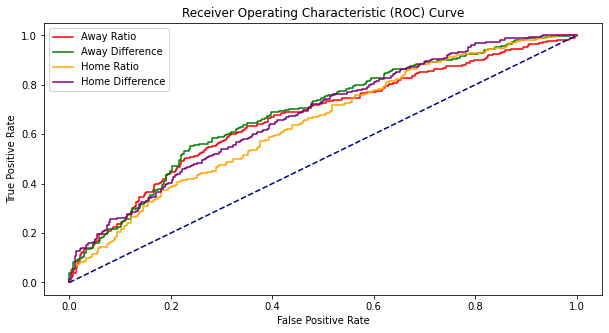

In [34]:
plt.plot(fpr_away_ratio, tpr_away_ratio, color='red',label='Away Ratio')
plt.plot(fpr_away_diff, tpr_away_diff, color = 'green', label = "Away Difference")
plt.plot(fpr_home_ratio, tpr_home_ratio, color='orange',label='Home Ratio')
plt.plot(fpr_home_diff, tpr_home_diff, color = 'purple', label = "Home Difference")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [36]:
def rf(X_train, X_test, y_train, y_test):
    mod = RandomForestClassifier(random_state = 426)
    param_grid ={'n_estimators': [100,500,1000], # number of trees in the forest
             'criterion': ["gini", "entropy"],
             'max_depth': [3, 5, 7],     # max number of layers
             'min_samples_leaf': [1, 10]}
    gs = GridSearchCV(mod, param_grid, scoring='accuracy',cv = 3)
    rf_fit = gs.fit(X_train, y_train)
    
    train_preds = rf_fit.predict(X_train)
    train_preds_probs = rf_fit.predict_proba(X_train)
    
    test_preds = rf_fit.predict(X_test)
    test_preds_probs = rf_fit.predict_proba(X_test)
    return train_preds, train_preds_probs, test_preds, test_preds_probs, gs.best_params_

In [37]:
def rf_cv(X_train, X_test, y_train, y_test):
    mod = RandomForestClassifier(random_state = 426)
    param_grid ={'n_estimators': [100,500,1000], # number of trees in the forest
             'criterion': ["gini", "entropy"],
             'max_depth': [3, 5, 7],     # max number of layers
             'min_samples_leaf': [1, 10]}
    gs = GridSearchCV(mod, param_grid, scoring='accuracy',cv = 3)
    rf_fit = gs.fit(X_train, y_train)
    scores = cross_validate(
    estimator = rf_fit, 
    X = X_train, 
    y = y_train,
    scoring = ['accuracy'], 
    cv = 5, 
    n_jobs = -1)
    accuracy_cv = scores['test_accuracy'].mean()
    return accuracy_cv

In [38]:
y_a = away['WINNER'].values
X_ar = away[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
y_h = home['WINNER'].values
X_hr = home[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
X_ad = away[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values
X_hd = home[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values

In [39]:
X_hr_train, X_hr_test, y_hr_train, y_hr_test = train_test_split(X_hr, y_h, stratify = y_h, test_size = 0.3, random_state = 426)

In [40]:
X_hr_train_preds, X_hr_train_probs, X_hr_test_preds, X_hr_test_probs, hr_best_parms = rf(X_hr_train, X_hr_test, y_hr_train, y_hr_test)
accuracy_hr = rf_cv(X_hr_train, X_hr_test, y_hr_train, y_hr_test)
print(accuracy_hr)
fpr_home_ratio_rf, tpr_home_ratio_rf, thresh = roc_curve(y_hr_test, X_hr_test_probs[:,1])

0.589972850678733


In [33]:
print(metrics.classification_report(y_hr_train, X_hr_train_preds))

              precision    recall  f1-score   support

           0       0.67      0.28      0.40       696
           1       0.62      0.90      0.74       921

    accuracy                           0.63      1617
   macro avg       0.65      0.59      0.57      1617
weighted avg       0.65      0.63      0.59      1617



In [34]:
print(metrics.classification_report(y_hr_test, X_hr_test_preds))

              precision    recall  f1-score   support

           0       0.59      0.28      0.38       298
           1       0.61      0.86      0.71       395

    accuracy                           0.61       693
   macro avg       0.60      0.57      0.54       693
weighted avg       0.60      0.61      0.57       693



In [35]:
X_ar_train, X_ar_test, y_ar_train, y_ar_test = train_test_split(X_ar, y_a, stratify = y_a, test_size = 0.3, random_state = 426)

In [36]:
X_ar_train_preds, X_ar_train_probs, X_ar_test_preds, X_ar_test_probs, ar_best_parms = rf(X_ar_train, X_ar_test, y_ar_train, y_ar_test)
fpr_away_ratio_rf, tpr_away_ratio_rf, thresh = roc_curve(y_ar_test, X_ar_test_probs[:,1])
accuracy_ar = rf_cv(X_ar_train, X_ar_test, y_ar_train, y_ar_test)
print(accuracy_ar)

In [37]:
print(metrics.classification_report(y_ar_train, X_ar_train_preds))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       921
           1       0.73      0.50      0.59       696

    accuracy                           0.70      1617
   macro avg       0.71      0.68      0.68      1617
weighted avg       0.71      0.70      0.69      1617



In [38]:
print(metrics.classification_report(y_ar_test, X_ar_test_preds))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       395
           1       0.58      0.39      0.46       298

    accuracy                           0.61       693
   macro avg       0.60      0.59      0.58       693
weighted avg       0.61      0.61      0.60       693



In [39]:
X_hd_train, X_hd_test, y_hd_train, y_hd_test = train_test_split(X_hd, y_h, stratify = y_h, test_size = 0.3, random_state = 426)

In [40]:
X_hd_train_preds, X_hd_train_probs, X_hd_test_preds, X_hd_test_probs, hd_best_parms = rf(X_hd_train, X_hd_test, y_hd_train, y_hd_test)
fpr_home_diff_rf, tpr_home_diff_rf, thresh = roc_curve(y_hd_test, X_hd_test_probs[:,1])
accuracy_hd = rf_cv(X_hd_train, X_hd_test, y_hd_train, y_hd_test)
print(accuracy_hd)

In [41]:
print(metrics.classification_report(y_hd_train, X_hd_train_preds))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52       696
           1       0.66      0.88      0.76       921

    accuracy                           0.68      1617
   macro avg       0.69      0.64      0.64      1617
weighted avg       0.69      0.68      0.65      1617



In [42]:
print(metrics.classification_report(y_hd_test, X_hd_test_preds))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46       298
           1       0.63      0.81      0.71       395

    accuracy                           0.62       693
   macro avg       0.62      0.59      0.59       693
weighted avg       0.62      0.62      0.60       693



In [43]:
X_ad_train, X_ad_test, y_ad_train, y_ad_test = train_test_split(X_ad, y_a, stratify = y_a, test_size = 0.3, random_state = 426)

In [44]:
X_ad_train_preds, X_ad_train_probs, X_ad_test_preds, X_ad_test_probs, ad_best_parms = rf(X_ad_train, X_ad_test, y_ad_train, y_ad_test)
fpr_away_diff_rf, tpr_away_diff_rf, thresh = roc_curve(y_ad_test, X_ad_test_probs[:,1])
accuracy_ad = rf_cv(X_ad_train, X_ad_test, y_ad_train, y_ad_test)
print(accuracy_ad)

In [45]:
print(metrics.classification_report(y_ad_train, X_ad_train_preds))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       921
           1       0.81      0.55      0.65       696

    accuracy                           0.75      1617
   macro avg       0.77      0.73      0.73      1617
weighted avg       0.76      0.75      0.74      1617



In [46]:
print(metrics.classification_report(y_ad_test, X_ad_test_preds))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       395
           1       0.57      0.40      0.47       298

    accuracy                           0.61       693
   macro avg       0.60      0.59      0.58       693
weighted avg       0.61      0.61      0.60       693



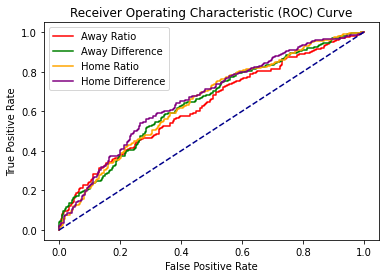

In [47]:
plt.plot(fpr_away_ratio_rf, tpr_away_ratio_rf, color='red',label='Away Ratio')
plt.plot(fpr_away_diff_rf, tpr_away_diff_rf, color = 'green', label = "Away Difference")
plt.plot(fpr_home_ratio_rf, tpr_home_ratio_rf, color='orange',label='Home Ratio')
plt.plot(fpr_home_diff_rf, tpr_home_diff_rf, color = 'purple', label = "Home Difference")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [48]:
X_hr = home[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
y_hr = home['WINNER'].values

X_hr_train, X_hr_test, y_hr_train, y_hr_test = train_test_split(X_hr, y_hr, stratify = y_hr, random_state = 426, test_size = .3)

In [49]:
X_ar = away[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
y_ar = away['WINNER'].values

X_ar_train, X_ar_test, y_ar_train, y_ar_test = train_test_split(X_ar, y_ar, stratify = y_ar, random_state = 426, test_size = .3)

In [50]:
X_hd = home[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values
y_hd = home['WINNER'].values

X_hd_train, X_hd_test, y_hd_train, y_hd_test = train_test_split(X_hd, y_hd, stratify = y_hd, random_state = 426, test_size = .3)

In [51]:
X_ad = away[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values
y_ad = away['WINNER'].values

X_ad_train, X_ad_test, y_ad_train, y_ad_test = train_test_split(X_ad, y_ad, stratify = y_ad, random_state = 426, test_size = .3)

In [41]:
def xgb_cv(X_train, X_test, y_train, y_test):
    param_grid = {'xgb__learning_rate': [.05, .1, .15],
              'xgb__max_depth': [2, 3, 4],
              'xgb__n_estimators': [19, 20, 21, 22, 23],
              'xgb__subsample': [.4, .5, .6],
              'xgb__use_label_encoder': [False],
              'xgb__eval_metric': ['logloss']}

    modXGB = Pipeline([('xgb', XGBClassifier())])

    gs = GridSearchCV(estimator = modXGB, param_grid = param_grid, cv = 5)
    xgb_fit = gs.fit(X_train, y_train)
    scores = cross_validate(
    estimator = xgb_fit, 
    X = X_train, 
    y = y_train,
    scoring = ['accuracy'], 
    cv = 5, 
    n_jobs = -1)
    accuracy_cv = scores['test_accuracy'].mean()
    return accuracy_cv

In [42]:
def gb_cv(X_train, X_test, y_train, y_test):
    gb_fit = GradientBoostingClassifier().fit(X_ar_train, y_ar_train)
    scores = cross_validate(
    estimator = gb_fit, 
    X = X_train, 
    y = y_train,
    scoring = ['accuracy'], 
    cv = 5, 
    n_jobs = -1)
    accuracy_cv = scores['test_accuracy'].mean()
    return accuracy_cv

In [52]:
param_grid = {'xgb__learning_rate': [.05, .1, .15],
              'xgb__max_depth': [2, 3, 4],
              'xgb__n_estimators': [19, 20, 21, 22, 23],
              'xgb__subsample': [.4, .5, .6],
              'xgb__use_label_encoder': [False],
              'xgb__eval_metric': ['logloss']}

modXGB = Pipeline([('xgb', XGBClassifier())])

gs = GridSearchCV(estimator = modXGB, param_grid = param_grid, cv = 5)
gs.fit(X_hr_train, y_hr_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                 

In [53]:
# Fit XGBClassifier with tuned parameters
xgb = Pipeline([('xgb', XGBClassifier(
    learning_rate = gs.best_params_['xgb__learning_rate'],
    max_depth = gs.best_params_['xgb__max_depth'], 
    n_estimators = gs.best_params_['xgb__n_estimators'],
    subsample = gs.best_params_['xgb__subsample'],
    use_label_encoder = gs.best_params_['xgb__use_label_encoder'],
    eval_metric = gs.best_params_['xgb__eval_metric']))])

xgb.fit(X_hr_train, y_hr_train)

# Predictions and predicted probabilities for training set
xgb_hr_train = xgb.predict(X_hr_train)
xgb_hr_train_prob = xgb.predict_proba(X_hr_train)[:,1]

# Predictions and predicted probabilities for test set
xgb_hr_test = xgb.predict(X_hr_test)
xgb_hr_test_prob = xgb.predict_proba(X_hr_test)[:,1]
fpr_home_ratio_xgb, tpr_home_ratio_xgb, thresh = roc_curve(y_hr_test, xgb_hr_test_prob)
accuracy_hr = xgb_cv(X_hr_train, X_hr_test, y_hr_train, y_hr_test)
print(accuracy_hr)

In [54]:
print(metrics.classification_report(y_hr_train, xgb_hr_train))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58       696
           1       0.69      0.88      0.77       921

    accuracy                           0.70      1617
   macro avg       0.71      0.67      0.67      1617
weighted avg       0.71      0.70      0.69      1617



In [55]:
print(metrics.classification_report(y_hr_test, xgb_hr_test))

              precision    recall  f1-score   support

           0       0.63      0.45      0.52       298
           1       0.66      0.80      0.72       395

    accuracy                           0.65       693
   macro avg       0.64      0.62      0.62       693
weighted avg       0.64      0.65      0.64       693



In [56]:
param_grid = {'xgb__learning_rate': [.05, .1, .15],
              'xgb__max_depth': [2, 3, 4],
              'xgb__n_estimators': [19, 20, 21, 22, 23],
              'xgb__subsample': [.4, .5, .6],
              'xgb__use_label_encoder': [False],
              'xgb__eval_metric': ['logloss']}

modXGB = Pipeline([('xgb', XGBClassifier())])

gs = GridSearchCV(estimator = modXGB, param_grid = param_grid, cv = 5)
gs.fit(X_ar_train, y_ar_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                 

In [57]:
# Fit XGBClassifier with tuned parameters
xgb = Pipeline([('xgb', XGBClassifier(
    learning_rate = gs.best_params_['xgb__learning_rate'],
    max_depth = gs.best_params_['xgb__max_depth'], 
    n_estimators = gs.best_params_['xgb__n_estimators'],
    subsample = gs.best_params_['xgb__subsample'],
    use_label_encoder = gs.best_params_['xgb__use_label_encoder'],
    eval_metric = gs.best_params_['xgb__eval_metric']))])

xgb.fit(X_ar_train, y_ar_train)

# Predictions and predicted probabilities for training set
xgb_ar_train = xgb.predict(X_ar_train)
xgb_ar_train_prob = xgb.predict_proba(X_ar_train)[:,1]

# Predictions and predicted probabilities for test set
xgb_ar_test = xgb.predict(X_ar_test)
xgb_ar_test_prob = xgb.predict_proba(X_ar_test)[:,1]

fpr_away_ratio_xgb, tpr_away_ratio_xgb, thresh = roc_curve(y_ar_test, xgb_ar_test_prob)
accuracy_ar = xgb_cv(X_ar_train, X_ar_test, y_ar_train, y_ar_test)
print(accuracy_ar)

In [58]:
print(metrics.classification_report(y_ar_train, xgb_ar_train))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73       921
           1       0.64      0.41      0.50       696

    accuracy                           0.65      1617
   macro avg       0.64      0.62      0.61      1617
weighted avg       0.64      0.65      0.63      1617



In [59]:
print(metrics.classification_report(y_ar_test, xgb_ar_test))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       395
           1       0.59      0.41      0.48       298

    accuracy                           0.62       693
   macro avg       0.62      0.60      0.59       693
weighted avg       0.62      0.62      0.61       693



In [60]:
param_grid = {'xgb__learning_rate': [.05, .1, .15],
              'xgb__max_depth': [2, 3, 4],
              'xgb__n_estimators': [19, 20, 21, 22, 23],
              'xgb__subsample': [.4, .5, .6],
              'xgb__use_label_encoder': [False],
              'xgb__eval_metric': ['logloss']}

modXGB = Pipeline([('xgb', XGBClassifier())])

gs = GridSearchCV(estimator = modXGB, param_grid = param_grid, cv = 5)
gs.fit(X_hd_train, y_hd_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                 

In [61]:
# Fit XGBClassifier with tuned parameters
xgb = Pipeline([('xgb', XGBClassifier(
    learning_rate = gs.best_params_['xgb__learning_rate'],
    max_depth = gs.best_params_['xgb__max_depth'], 
    n_estimators = gs.best_params_['xgb__n_estimators'],
    subsample = gs.best_params_['xgb__subsample'],
    use_label_encoder = gs.best_params_['xgb__use_label_encoder'],
    eval_metric = gs.best_params_['xgb__eval_metric']))])

xgb.fit(X_hd_train, y_hd_train)

# Predictions and predicted probabilities for training set
xgb_hd_train = xgb.predict(X_hd_train)
xgb_hd_train_prob = xgb.predict_proba(X_hd_train)[:,1]

# Predictions and predicted probabilities for test set
xgb_hd_test = xgb.predict(X_hd_test)
xgb_hd_test_prob = xgb.predict_proba(X_hd_test)[:,1]

fpr_home_diff_xgb, tpr_home_diff_xgb, thresh = roc_curve(y_hd_test, xgb_hd_test_prob)
accuracy_hd = xgb_cv(X_hd_train, X_hd_test, y_hd_train, y_hd_test)
print(accuracy_hd)

In [62]:
print(metrics.classification_report(y_hd_train, xgb_hd_train))

              precision    recall  f1-score   support

           0       0.67      0.30      0.41       696
           1       0.63      0.89      0.73       921

    accuracy                           0.64      1617
   macro avg       0.65      0.59      0.57      1617
weighted avg       0.65      0.64      0.60      1617



In [63]:
print(metrics.classification_report(y_hd_test, xgb_hd_test))

              precision    recall  f1-score   support

           0       0.62      0.31      0.41       298
           1       0.62      0.85      0.72       395

    accuracy                           0.62       693
   macro avg       0.62      0.58      0.57       693
weighted avg       0.62      0.62      0.59       693



In [64]:
param_grid = {'xgb__learning_rate': [.05, .1, .15],
              'xgb__max_depth': [2, 3, 4],
              'xgb__n_estimators': [19, 20, 21, 22, 23],
              'xgb__subsample': [.4, .5, .6],
              'xgb__use_label_encoder': [False],
              'xgb__eval_metric': ['logloss']}

modXGB = Pipeline([('xgb', XGBClassifier())])

gs = GridSearchCV(estimator = modXGB, param_grid = param_grid, cv = 5)
gs.fit(X_ad_train, y_ad_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                 

In [65]:
# Fit XGBClassifier with tuned parameters
xgb = Pipeline([('xgb', XGBClassifier(
    learning_rate = gs.best_params_['xgb__learning_rate'],
    max_depth = gs.best_params_['xgb__max_depth'], 
    n_estimators = gs.best_params_['xgb__n_estimators'],
    subsample = gs.best_params_['xgb__subsample'],
    use_label_encoder = gs.best_params_['xgb__use_label_encoder'],
    eval_metric = gs.best_params_['xgb__eval_metric']))])

xgb.fit(X_hd_train, y_hd_train)

# Predictions and predicted probabilities for training set
xgb_ad_train = xgb.predict(X_ad_train)
xgb_ad_train_prob = xgb.predict_proba(X_ad_train)[:,1]

# Predictions and predicted probabilities for test set
xgb_ad_test = xgb.predict(X_ad_test)
xgb_ad_test_prob = xgb.predict_proba(X_ad_test)[:,1]
fpr_away_diff_xgb, tpr_away_diff_xgb, thresh = roc_curve(y_ad_test, xgb_ad_test_prob)
accuracy_ad = xgb_cv(X_ad_train, X_ad_test, y_ad_train, y_ad_test)
print(accuracy_ad)

In [66]:
print(metrics.classification_report(y_ad_train, xgb_ad_train))

              precision    recall  f1-score   support

           0       0.71      0.36      0.48       921
           1       0.49      0.80      0.61       696

    accuracy                           0.55      1617
   macro avg       0.60      0.58      0.54      1617
weighted avg       0.61      0.55      0.53      1617



In [67]:
print(metrics.classification_report(y_ad_test, xgb_ad_test))

              precision    recall  f1-score   support

           0       0.74      0.34      0.47       395
           1       0.49      0.84      0.62       298

    accuracy                           0.56       693
   macro avg       0.61      0.59      0.54       693
weighted avg       0.63      0.56      0.53       693



In [70]:
gb = GradientBoostingClassifier().fit(X_hr_train, y_hr_train)

# Predictions and predicted probabilities for training set
gb_hr_train = gb.predict(X_hr_train)
gb_hr_train_prob = gb.predict_proba(X_hr_train)[:,1]

# Predictions and predicted probabilities for test set
gb_hr_test = gb.predict(X_hr_test)
gb_hr_test_prob = gb.predict_proba(X_hr_test)[:,1]

fpr_home_ratio_gb, tpr_home_ratio_gb, thresh = roc_curve(y_hr_test, gb_hr_test_prob)
accuracy_hr = gb_cv(X_hr_train, X_hr_test, y_hr_train, y_hr_test)
print(accuracy_hr)

In [71]:
print(metrics.classification_report(y_hr_train, gb_hr_train))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73       696
           1       0.77      0.91      0.83       921

    accuracy                           0.79      1617
   macro avg       0.81      0.78      0.78      1617
weighted avg       0.80      0.79      0.79      1617



In [72]:
print(metrics.classification_report(y_hr_test, gb_hr_test))

              precision    recall  f1-score   support

           0       0.56      0.48      0.51       298
           1       0.64      0.72      0.68       395

    accuracy                           0.61       693
   macro avg       0.60      0.60      0.60       693
weighted avg       0.61      0.61      0.61       693



In [73]:
gb = GradientBoostingClassifier().fit(X_ar_train, y_ar_train)

# Predictions and predicted probabilities for training set
gb_ar_train = gb.predict(X_ar_train)
gb_ar_train_prob = gb.predict_proba(X_ar_train)[:,1]

# Predictions and predicted probabilities for test set
gb_ar_test = gb.predict(X_ar_test)
gb_ar_test_prob = gb.predict_proba(X_ar_test)[:,1]
fpr_away_ratio_gb, tpr_away_ratio_gb, thresh = roc_curve(y_ar_test, gb_ar_test_prob)
accuracy_ar = gb_cv(X_ar_train, X_ar_test, y_ar_train, y_ar_test)
print(accuracy_ar)

In [74]:
print(metrics.classification_report(y_ar_train, gb_ar_train))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       921
           1       0.84      0.66      0.74       696

    accuracy                           0.80      1617
   macro avg       0.81      0.79      0.79      1617
weighted avg       0.81      0.80      0.80      1617



In [75]:
print(metrics.classification_report(y_ar_test, gb_ar_test))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       395
           1       0.57      0.48      0.52       298

    accuracy                           0.62       693
   macro avg       0.61      0.61      0.61       693
weighted avg       0.62      0.62      0.62       693



In [76]:
gb = GradientBoostingClassifier().fit(X_hd_train, y_hd_train)

# Predictions and predicted probabilities for training set
gb_hd_train = gb.predict(X_hd_train)
gb_hd_train_prob = gb.predict_proba(X_hd_train)[:,1]

# Predictions and predicted probabilities for test set
gb_hd_test = gb.predict(X_hd_test)
gb_hd_test_prob = gb.predict_proba(X_hd_test)[:,1]
fpr_home_diff_gb, tpr_home_diff_gb, thresh = roc_curve(y_hd_test, gb_hd_test_prob)
accuracy_hd = gb_cv(X_hd_train, X_hd_test, y_hd_train, y_hd_test)
print(accuracy_hd)

In [77]:
print(metrics.classification_report(y_hd_train, gb_hd_train))

              precision    recall  f1-score   support

           0       0.81      0.59      0.69       696
           1       0.74      0.89      0.81       921

    accuracy                           0.76      1617
   macro avg       0.78      0.74      0.75      1617
weighted avg       0.77      0.76      0.76      1617



In [78]:
print(metrics.classification_report(y_hd_test, gb_hd_test))

              precision    recall  f1-score   support

           0       0.56      0.38      0.45       298
           1       0.62      0.78      0.69       395

    accuracy                           0.61       693
   macro avg       0.59      0.58      0.57       693
weighted avg       0.60      0.61      0.59       693



In [86]:
gb = GradientBoostingClassifier().fit(X_ad_train, y_ad_train)

# Predictions and predicted probabilities for training set
gb_ad_train = gb.predict(X_ad_train)
gb_ad_train_prob = gb.predict_proba(X_ad_train)[:,1]

# Predictions and predicted probabilities for test set
gb_ad_test = gb.predict(X_ad_test)
gb_ad_test_prob = gb.predict_proba(X_ad_test)[:,1]
fpr_away_diff_gb, tpr_away_diff_gb, thresh = roc_curve(y_hd_test, xgb_hd_test_prob)
accuracy_ad = gb_cv(X_ad_train, X_ad_test, y_ad_train, y_ad_test)
print(accuracy_ad)

In [87]:
print(metrics.classification_report(y_ad_train, gb_ad_train))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       921
           1       0.84      0.62      0.71       696

    accuracy                           0.78      1617
   macro avg       0.80      0.76      0.77      1617
weighted avg       0.79      0.78      0.78      1617



In [88]:
print(metrics.classification_report(y_ad_test, gb_ad_test))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       395
           1       0.55      0.43      0.49       298

    accuracy                           0.61       693
   macro avg       0.59      0.58      0.58       693
weighted avg       0.60      0.61      0.60       693



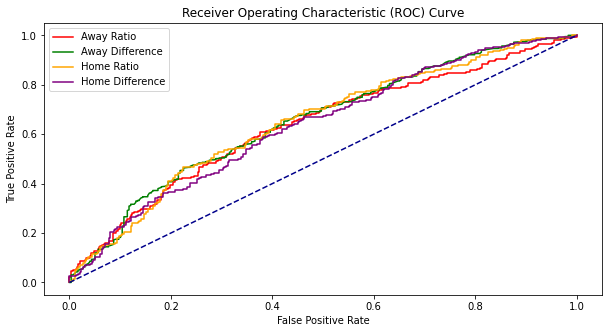

In [89]:
plt.plot(fpr_away_ratio_gb, tpr_away_ratio_gb, color='red',label='Away Ratio')
plt.plot(fpr_away_diff_gb, tpr_away_diff_gb, color = 'green', label = "Away Difference")
plt.plot(fpr_home_ratio_gb, tpr_home_ratio_gb, color='orange',label='Home Ratio')
plt.plot(fpr_home_diff_gb, tpr_home_diff_gb, color = 'purple', label = "Home Difference")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

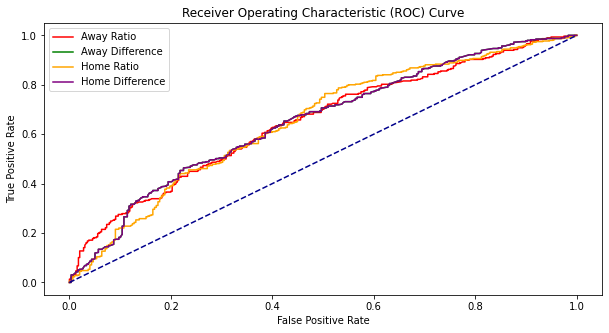

In [90]:
plt.plot(fpr_away_ratio_xgb, tpr_away_ratio_xgb, color='red',label='Away Ratio')
plt.plot(fpr_away_diff_xgb, tpr_away_diff_xgb, color = 'green', label = "Away Difference")
plt.plot(fpr_home_ratio_xgb, tpr_home_ratio_xgb, color='orange',label='Home Ratio')
plt.plot(fpr_home_diff_xgb, tpr_home_diff_xgb, color = 'purple', label = "Home Difference")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

Text(87, 0.465, 'n = 86')

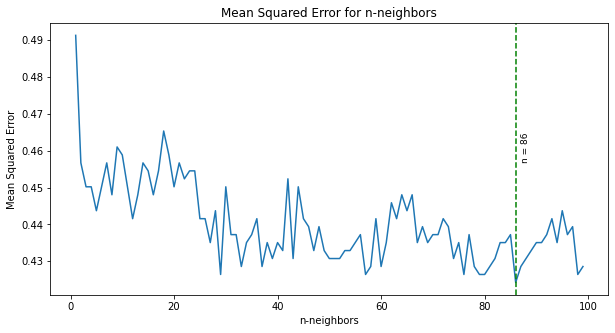

In [48]:
y = away['WINNER'].values
X = away[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 426, test_size = .3)

# Find the best value for the hyperparameter for amount of neighbors through 5-fold cross validation

kf = KFold(5)

mse_cv = []
mse_cv_mean = []

for p in np.arange(1, 100):
    for itrain, itest in kf.split(X):
        X_train,X_test,y_train,y_test = X[itrain], X[itest], y[itrain], y[itest]
        knn = KNeighborsClassifier(n_neighbors = p)
        knn.fit(X_train, y_train)
        val = mean_squared_error(y_test, knn.predict(X_test))
        mse_cv_mean.append(val)
    mse_cv.append(np.mean(val))

hyper = mse_cv.index(min(mse_cv)) + 1
textstr = "n = " + str(hyper)
#props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

plt.plot(np.arange(1, 100), mse_cv)
plt.axvline(x = hyper, linestyle = 'dashed', color = 'green')
plt.xlabel("n-neighbors")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for n-neighbors")
plt.text(hyper + 1, 0.465, textstr, fontsize = 9, verticalalignment = 'top', rotation = 90)

In [49]:
def knn_model_preds(X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(n_neighbors = hyper)
  fit_knn = knn.fit(X_train, y_train)
  
  train_preds = fit_knn.predict(X_train)
  train_prob = fit_knn.predict_proba(X_train)[:,1]
  test_preds = fit_knn.predict(X_test)
  test_prob = fit_knn.predict_proba(X_test)[:,1]
  return train_preds, train_prob, test_preds, test_prob


In [50]:
def knn_cv(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors = hyper)
    fit_knn = knn.fit(X_train, y_train)
  
    scores = cross_validate(
        estimator = fit_knn, 
        X = X_train, 
        y = y_train,
        scoring = ['accuracy'], 
        cv = 5, 
        n_jobs = -1)
    accuracy_cv = scores['test_accuracy'].mean()
    
    return accuracy_cv


In [51]:
away_ratio_train, away_ratio_train_p, away_ratio_test, away_ratio_test_p = knn_model_preds(X_train, X_test, y_train, y_test)
print(metrics.classification_report(y_train, away_ratio_train))
print(metrics.classification_report(y_test, away_ratio_test))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74      1064
           1       0.68      0.19      0.30       784

    accuracy                           0.62      1848
   macro avg       0.65      0.56      0.52      1848
weighted avg       0.64      0.62      0.55      1848

              precision    recall  f1-score   support

           0       0.57      0.92      0.70       252
           1       0.62      0.17      0.26       210

    accuracy                           0.58       462
   macro avg       0.60      0.54      0.48       462
weighted avg       0.59      0.58      0.50       462



In [52]:
fpr_away_ratio, tpr_away_ratio, thresh = roc_curve(y_test, away_ratio_test)
accuracy_ar = knn_cv(X_train, X_test, y_train, y_test)
print(accuracy_ar)

0.6022796709753232


In [53]:
X_diff = away[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values
X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify = y, random_state = 426, test_size = .3)

In [54]:
away_diff_train, away_diff_train_p, away_diff_test, away_diff_test_p = knn_model_preds(X_train, X_test, y_train, y_test)
print(metrics.classification_report(y_train, away_diff_train))
print(metrics.classification_report(y_test, away_diff_test))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72       921
           1       0.63      0.28      0.39       696

    accuracy                           0.62      1617
   macro avg       0.62      0.58      0.56      1617
weighted avg       0.62      0.62      0.58      1617

              precision    recall  f1-score   support

           0       0.60      0.86      0.70       395
           1       0.56      0.23      0.33       298

    accuracy                           0.59       693
   macro avg       0.58      0.55      0.52       693
weighted avg       0.58      0.59      0.54       693



In [55]:
fpr_away_diff, tpr_away_diff, thresh = roc_curve(y_test, away_diff_test_p)
accuracy_ad = knn_cv(X_train, X_test, y_train, y_test)
print(accuracy_ad)

0.6054679685639438


In [ ]:
y = home['WINNER'].values
X = home[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=426, test_size=.3)

In [ ]:
home_ratio_train, home_ratio_train_p, home_ratio_test, home_ratio_test_p = knn_model_preds(X_train, X_test, y_train, y_test)
print(metrics.classification_report(y_train, home_ratio_train))
print(metrics.classification_report(y_test, home_ratio_test))

In [ ]:
fpr_home_ratio, tpr_home_ratio, thresh = roc_curve(y_test, home_ratio_test_p)
accuracy_hr = knn_cv(X_train, X_test, y_train, y_test)
print(accuracy_hr)

In [ ]:
X_diff = home[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values
X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify = y, random_state = 426, test_size = .3)

In [ ]:
home_diff_train, home_diff_train_p, home_diff_test, home_diff_test_p = knn_model_preds(X_train, X_test, y_train, y_test)
print(metrics.classification_report(y_train, home_diff_train))
print(metrics.classification_report(y_test, home_diff_test))

In [ ]:
fpr_home_diff, tpr_home_diff, thresh = roc_curve(y_test, home_diff_test_p)
accuracy_hd = knn_cv(X_train, X_test, y_train, y_test)
print(accuracy_hd)

In [ ]:
plt.plot(fpr_away_ratio, tpr_away_ratio, color='red',label='Away Ratio')
plt.plot(fpr_away_diff, tpr_away_diff, color = 'green', label = "Away Difference")
plt.plot(fpr_home_ratio, tpr_home_ratio, color='orange',label='Home Ratio')
plt.plot(fpr_home_diff, tpr_home_diff, color = 'purple', label = "Home Difference")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)